Importando bibliotecas para o desenvolvimento do projeto

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report

In [2]:
dados = pd.read_csv('Base_Dados/heart_Disease.csv', sep=',')

1 — description

•    age: The person's age in years
•    sex: The person's sex (1 = male, 0 = female)
•    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
•    trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
•    chol: The person's cholesterol measurement in mg/dl
•    fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
•    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
•    thalach: The person's maximum heart rate achieved
•    exang: Exercise induced angina (1 = yes; 0 = no)
•    oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
•    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
•    ca: The number of major vessels (0-3)
•    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
•    target: Heart disease (0 = no, 1 = yes)
2 — description


cp: chest pain type
-- Value 0: asymptomatic
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: typical angina
 
restecg: resting electrocardiographic results
-- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
-- Value 1: normal
-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 
slope: the slope of the peak exercise ST segment
0: downsloping; 1: flat; 2: upsloping
 
thal
Results of the blood flow observed via the radioactive dye.
 
Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.
 
target : 0 = disease, 1 = no disease

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dados.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
dados.shape

(303, 14)

In [7]:
dados.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
dados.corr(method='pearson').round(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0000,-0.0984,-0.0687,0.2794,0.2137,0.1213,-0.1162,-0.3985,0.0968,0.2100,-0.1688,0.2763,0.0680,-0.2254
sex,-0.0984,1.0000,-0.0494,-0.0568,-0.1979,0.0450,-0.0582,-0.0440,0.1417,0.0961,-0.0307,0.1183,0.2100,-0.2809
cp,-0.0687,-0.0494,1.0000,0.0476,-0.0769,0.0944,0.0444,0.2958,-0.3943,-0.1492,0.1197,-0.1811,-0.1617,0.4338
trestbps,0.2794,-0.0568,0.0476,1.0000,0.1232,0.1775,-0.1141,-0.0467,0.0676,0.1932,-0.1215,0.1014,0.0622,-0.1449
chol,0.2137,-0.1979,-0.0769,0.1232,1.0000,0.0133,-0.1510,-0.0099,0.0670,0.0540,-0.0040,0.0705,0.0988,-0.0852
fbs,0.1213,0.0450,0.0944,0.1775,0.0133,1.0000,-0.0842,-0.0086,0.0257,0.0057,-0.0599,0.1380,-0.0320,-0.0280
restecg,-0.1162,-0.0582,0.0444,-0.1141,-0.1510,-0.0842,1.0000,0.0441,-0.0707,-0.0588,0.0930,-0.0720,-0.0120,0.1372
thalach,-0.3985,-0.0440,0.2958,-0.0467,-0.0099,-0.0086,0.0441,1.0000,-0.3788,-0.3442,0.3868,-0.2132,-0.0964,0.4217
exang,0.0968,0.1417,-0.3943,0.0676,0.0670,0.0257,-0.0707,-0.3788,1.0000,0.2882,-0.2577,0.1157,0.2068,-0.4368
oldpeak,0.2100,0.0961,-0.1492,0.1932,0.0540,0.0057,-0.0588,-0.3442,0.2882,1.0000,-0.5775,0.2227,0.2102,-0.4307


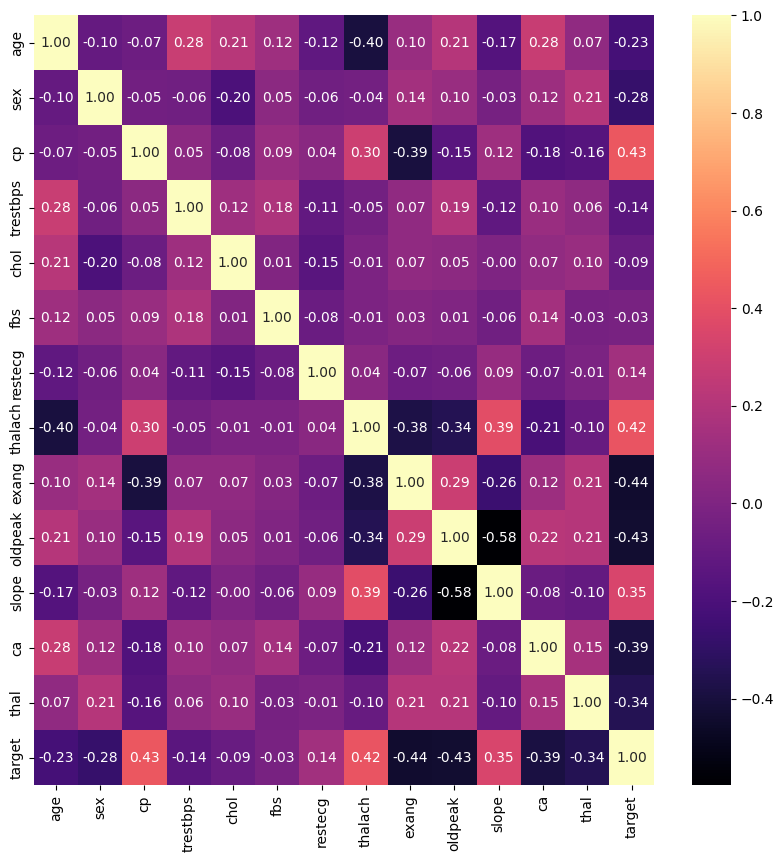

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(dados.corr(), annot=True,cmap='magma',fmt='.2f')
plt.show()


In [10]:
y = dados['target']

In [11]:
X = dados[['thalach', 'slope', 'cp']]

In [28]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=85)

In [29]:
print(
    X_treino.shape,
    X_teste.shape,
    y_treino.shape,
    y_teste.shape,
    (X_treino.shape[0] + X_teste.shape[0])
)

(212, 3) (91, 3) (212,) (91,) 303


Decision Tree Classifier

In [30]:
modelo_arvore = DecisionTreeClassifier(random_state=85)

In [31]:
modelo_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=85)

In [32]:
y_pred = modelo_arvore.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred)

print(f'Acurácia do modelo: {acuracia}')
print(f'Relatório de classificação:\n{relatorio_classificacao}')

Acurácia do modelo: 0.7032967032967034
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        39
           1       0.79      0.65      0.72        52

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.72      0.70      0.70        91



KNeighborsClassifier

In [33]:
modelo_vizinhos = KNeighborsClassifier(n_neighbors=3)

In [34]:
modelo_vizinhos.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = modelo_vizinhos.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred)

print(f'Acurácia do modelo: {acuracia}')
print(f'Relatório de classificação:\n{relatorio_classificacao}')

Acurácia do modelo: 0.6703296703296703
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        39
           1       0.70      0.75      0.72        52

    accuracy                           0.67        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.67      0.67      0.67        91



Linear SVC

In [36]:
modelo_svc = LinearSVC(max_iter=10000,dual=False,random_state=85)

In [37]:
modelo_svc.fit(X_treino, y_treino)

LinearSVC(dual=False, max_iter=10000, random_state=85)

In [38]:
y_pred = modelo_svc.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred)

print(f'Acurácia do modelo: {acuracia}')
print(f'Relatório de classificação:\n{relatorio_classificacao}')

Acurácia do modelo: 0.7472527472527473
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        39
           1       0.78      0.77      0.78        52

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91

